# Helpfulness Prediction With Support Vector Regression
## Data Science and Big Data Analytics Project

---

### Authors: 
- **Andrea Alberti** ([GitHub](https://github.com/AndreaAlberti07))
- **Davide Ligari** ([GitHub](https://github.com/DavideLigari01))
- **Cristian Andreoli** ([GitHub](https://github.com/CristianAndreoli94))

### Date: September 2023

---

## Data: 
The chosen dataset is [Amazon Books Reviews](https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews).


## Goal:
Build a model able to predict the helpfulness of a review based on its content. 

---

In [1]:
import numpy as np
import numpy as np
import joblib
import matplotlib.pyplot as plt


from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the training and test data
train_data = np.load(
    '_gitignore/train_data_wv2_30_5.npz', allow_pickle=True)
test_data = np.load(
    '_gitignore/test_data_w2v_30_5.npz', allow_pickle=True)
X_train_embedding = train_data['x']
Y_train = train_data['y']
X_test_embedding = test_data['x']
Y_test = test_data['y']

In [9]:
param_grid = {
    'kernel': ['rbf', 'linear', 'poly']
}

svr_model = SVR()

grid_search = GridSearchCV(
    estimator=svr_model, param_grid=param_grid, cv=2, n_jobs=-1)
grid_search.fit(X_train_embedding, Y_train)
best_kernel = grid_search.best_params_['kernel']

param_grid_2 = {
    'kernel': [best_kernel],
    'C': [0.001, 0.1, 1]
}

grid_search_2 = GridSearchCV(
    estimator=svr_model, param_grid=param_grid_2, cv=2, n_jobs=-1)
grid_search_2.fit(X_train_embedding, Y_train)
best_svr_model = grid_search_2.best_estimator_
best_C = grid_search_2.best_params_['C']


joblib.dump(best_svr_model,
            f'trained/svr_rbf_c01.gz', compress=('gzip', 3))
# Make predictions using the best model
Y_pred = best_svr_model.predict(X_test_embedding)

print("Best kernel: ", best_kernel, "Best C: ", best_C)
print("Test MSE: ", mean_squared_error(Y_test, Y_pred))
print("Test R2: ", r2_score(Y_test, Y_pred))

Best kernel:  rbf Best C:  0.1
Test MSE:  0.027874512640404445
Test R2:  0.1954682824711782


In [13]:
param_grid_3 = {
    'kernel': [best_kernel],
    'C': [best_C],
    'degree': [3, 4, 6, 10]
}

grid_search_3 = GridSearchCV(
    estimator=svr_model, param_grid=param_grid_3, cv=2, n_jobs=-1)
grid_search_3.fit(X_train_embedding, Y_train)
best_svr_model = grid_search_3.best_estimator_
best_degree = grid_search_3.best_params_['degree']

best_svr_model = grid_search_3.best_estimator_

# Make predictions using the best model
Y_pred = best_svr_model.predict(X_test_embedding)

print("Best kernel: ", best_kernel, "Best C: ",
      best_C, "Best degree: ", best_degree)

print("Test MSE: ", mean_squared_error(Y_test, Y_pred))
print("Test R2: ", r2_score(Y_test, Y_pred))

joblib.dump(best_svr_model,
            f'trained/svr_rbf_c01-degree.gz', compress=('gzip', 3))

Best kernel:  rbf Best C:  3 Best degree:  3
Test MSE:  0.027874512640404445
Test R2:  0.1954682824711782


['../trained/svr_rbf_c01-degree.gz']

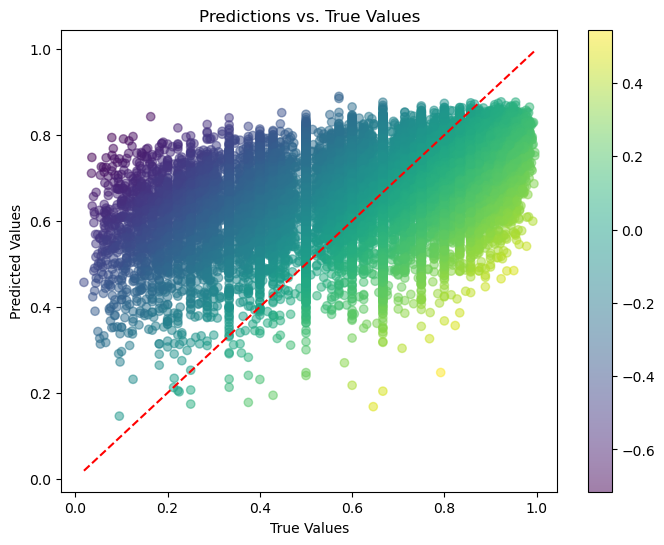

In [4]:
model = joblib.load('trained/svr_rbf_c01.gz')

Y_pred = model.predict(X_test_embedding)
residuals = Y_test - Y_pred

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, c=residuals, alpha=0.5, cmap='viridis')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. True Values')

plt.plot([min(Y_test), max(Y_test)], [min(Y_test),
         max(Y_test)], color='red', linestyle='--')
plt.colorbar()
# Show the plot
plt.show()